# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [43]:
import pandas as pd

df = pd.read_csv('human_body_temperature.csv')
print(df.index)

RangeIndex(start=0, stop=130, step=1)


   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


C:\Users\Ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


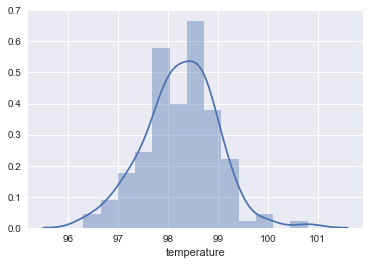

In [93]:
#Is the distribution of body temperatures normal?

# there are several ways, all starts with looking at the data and then using statistical methods


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import normaltest
import scipy.stats as stats

print(df.head())

sns.distplot(df.temperature)


MEAN =  98.24923076923078
STD =  0.7303577789050377


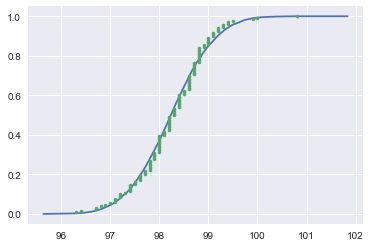

In [45]:
mean = np.mean(df['temperature'])
print('MEAN = ', mean)
std = np.std(df['temperature'])
print('STD = ', std)
samples = np.random.normal(mean, std, size = 10000)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1)/n

    return x, y


x, y = ecdf(df['temperature'])
x_t, y_t = ecdf(samples)

sns.set()

_ = plt.plot(x_t, y_t)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')


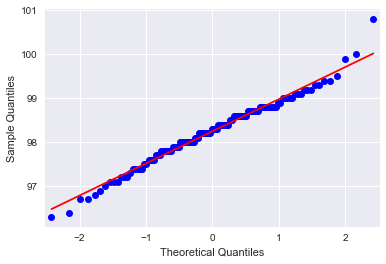

In [46]:
# q-q plot
sm.qqplot(df.temperature, line='s')
plt.show()

In [47]:
#Shapiro-Wilk Test
stat, p = shapiro(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


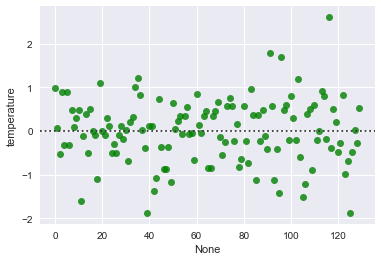

In [48]:
#Is the sample size large? Are the observations independent? 
# The sample size is big enought according to CLT. To use CTL, n> 30, so there is not problem in this case.
# We need to look at residul to verify independent observation. 

sns.residplot(df.index, df.temperature, lowess=False, color="g")

In [49]:
#Is the true population mean really 98.6 degrees F? 

# bootstrap method

dataa = df['temperature'].values

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

bs_replicates = draw_bs_reps(df['temperature'], np.mean, 10000)

p = np.sum(bs_replicates <= np.mean(df['temperature'])) / 10000
print('p = ', p)

p =  0.5043


In [ ]:
#Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
#In this situation, is it appropriate to use the t test or z test statistic? 
#Now try using the other test. How is the result be different? Why?

In [50]:
# it is a two-sided z test beacuse the H(0) = 98.6 and H(1) != 98.6. In this case, sign. level is 5%, each tail 2.5%
zscore = (df['temperature'].mean() - 98.6) * len(df['temperature']) ** 0.5 / df['temperature'].std()
zscore

-5.454823292364079

In [51]:
prob = stats.norm.sf(abs(zscore))*2

if prob > 0.05:
	print('not rejecting null hyp. ')
else:
	print('null hyp. is rejected ==> mean is not 98.6')


null hyp. is rejected ==> mean is not 98.6


In [52]:
stats.ttest_1samp(df['temperature'], 98.6)
# same result , we reject null hyp.

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [53]:
bs_sample = np.random.choice(dataa, size=10)
bs_sample

array([97.9, 99.9, 99.1, 98.3, 98.9, 98.2, 98.6, 99.3, 97.5, 98.3])

In [54]:
zscore = (df['temperature'].mean() - 98.6) * len(df['temperature']) ** 0.5 / df['temperature'].std()
zscore
#z-test should be used when sample size is more than n>30, when n<30 then t-test should be used.


-5.454823292364079

In [55]:
prob = stats.norm.sf(abs(zscore))*2

if prob > 0.05:
	print('not rejecting null hyp. ')
else:
	print('null hyp. is rejected ==> mean is not 98.6')

null hyp. is rejected ==> mean is not 98.6


In [56]:
stats.ttest_1samp(df['temperature'], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

95% confidence interval = [98.12076923 98.37461538] temperature


C:\Users\Ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


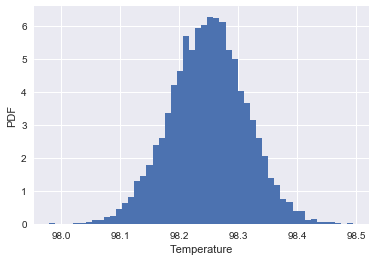

In [62]:
# At what temperature should we consider someone's temperature to be "abnormal"? 
# As in the previous example, try calculating everything using the boostrap approach, 
# as well as the frequentist approach. 
# Start by computing the margin of error and confidence interval. 
# When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, 
# and not N draws

# 98.6 is abnormal as it is not in the confidence interval

bs_replicates = draw_bs_reps(df['temperature'], np.mean, size = 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'temperature')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [65]:
stats.norm.interval(0.68, loc=df['temperature'].mean(), scale=df['temperature'].std()/len(df['temperature'])**0.5)

(98.18528273498113, 98.31317880348043)

In [81]:
print('95% confidence interval based on z-test is', df['temperature'].mean() - stats.norm.ppf(.975)*df['temperature'].std()/len(df['temperature'])**0.5, ' to ', df['temperature'].mean() + stats.norm.ppf(.975)*df['temperature'].std()/len(df['temperature'])**0.5)

95% confidence interval based on z-test is 98.12319642818166  to  98.3752651102799


In [83]:
print('95% confidence interval based on t-test is', df['temperature'].mean() - stats.t.ppf(1-0.025, 129)*df['temperature'].std()/len(df['temperature'])**0.5, ' to ', df['temperature'].mean() + stats.t.ppf(1-0.025, 129)*df['temperature'].std()/len(df['temperature'])**0.5)

95% confidence interval based on t-test is 98.12200290560804  to  98.37645863285351


Text(0,0.5,'PDF')

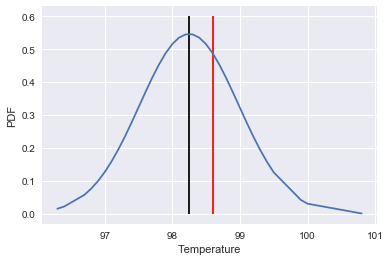

In [91]:
import pylab
x = df['temperature'].sort_values()
y = stats.norm.pdf(x, loc=mean, scale=std)    
pylab.plot(x,y)
pylab.vlines(df['temperature'].mean(),0, 0.6)
pylab.vlines(98.6,0,0.6,color='red')
pylab.xlabel('Temperature')
pylab.ylabel('PDF')

In [111]:
#Is there a significant difference between males and females in normal temperature? 
#What testing approach did you use and why? 
#Write a story with your conclusion in the context of the original problem.

# I use z-test whereas the number of samples for each group (male and female) is more than 30.

df_m = df['temperature'].loc[df['gender'] == 'M']
df_f = df['temperature'].loc[df['gender'] == 'F']
print(df_m.shape)
print(df_f.shape)
print(df_m.mean())
print(df_f.mean())

(65,)
(65,)
98.1046153846154
98.39384615384613


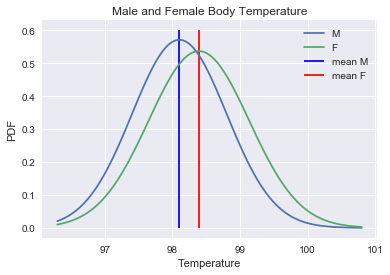

In [109]:
##Normal Distribution graph of Male and Female Temperatures
x = np.linspace(df['temperature'].min(),df['temperature'].max(),100)
y1 = stats.norm.pdf(x, loc=df_m.mean(), scale=df_m.std())    
pylab.plot(x,y1)

y2 = stats.norm.pdf(x, loc=df_f.mean(), scale=df_f.std())    
pylab.plot(x,y2)
pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(df_m.mean(),0, 0.6, color='blue')
pylab.vlines(df_f.mean(),0, 0.6, color='red')
pylab.legend(['M', 'F', 'mean M', 'mean F'])
pylab.title('Male and Female Body Temperature')
pylab.show()

In [145]:
z_value = (df_m.mean() - df_f.mean()) / (( (df_m.std()**2 / len(df_m)) + (df_f.std()**2 / len(df_f)) )**0.5)
print(z_value)
print(np.abs(z_value))
prob_diff = (stats.norm.cdf((z_value))*2)


if prob_diff > 0.05:
	print('not rejecting null hyp. ')
else:
	print('null hyp. is rejected ==> mean of men and female are not equal')

-2.285434538165274
2.285434538165274
null hyp. is rejected ==> mean of men and female are not equal
